In [25]:
import numpy as np

def create_grid(n, p):
    grid = []
    for _ in range(n):
        line = [' ' if np.random.binomial(1,p)==0 else '#' for _ in range(n)]
        grid.append(line)
    return grid

def print_grid(grid):
    for line in grid:
        print('|', end='')
        for c in line:
            print(c, end='')
        print('|')

In [41]:
def check_pos(pos, grid, n):
    y, x = pos
    if ((x in range(n)) and (y in range(n)) and (grid[y][x] == ' ')):
        return True
    return False

def bfs(grid):
    i, lqd, n = 0, [], len(grid)
    for c in grid[0]:
        if (c == ' '): lqd.append((0, i))
        i += 1
    while lqd:
        y,x = lqd.pop(0)
        grid[y][x] = '.'
        if (y == n-1): return True
        near = [(y-1, x), (y, x-1), (y, x+1), (y+1, x)]
        for pos in near:
            if (check_pos(pos, grid, n) and (pos not in lqd)): lqd.append(pos)
    return False

def dfs(grid):
    i, lqd, n = 0, [], len(grid)
    for c in grid[0]:
        if (c == ' '): lqd.append((0, i))
        i += 1
    while lqd:
        y,x = lqd.pop()
        grid[y][x] = '.'
        if (y == n-1): return True
        near = [(y-1, x), (y, x-1), (y, x+1), (y+1, x)]
        for pos in near:
            if (check_pos(pos, grid, n) and (pos not in lqd)): lqd.append(pos)
    return False

In [42]:
import matplotlib.pyplot as plt

def simulation(N, n, p, algo):
    true_time = 0
    for _ in range(N):
        grid = create_grid(n, p)
        if (algo(grid)): true_time += 1
    return (true_time/N)

def plot_graph(N, n, algo):
    x = [i / 10 for i in range(11)]
    y = []
    for p in x:
        y.append(simulation(N, n, p, algo))
    plt.plot(x, y)
    plt.xlabel('p')
    plt.ylabel('P(p)')
    plt.show()

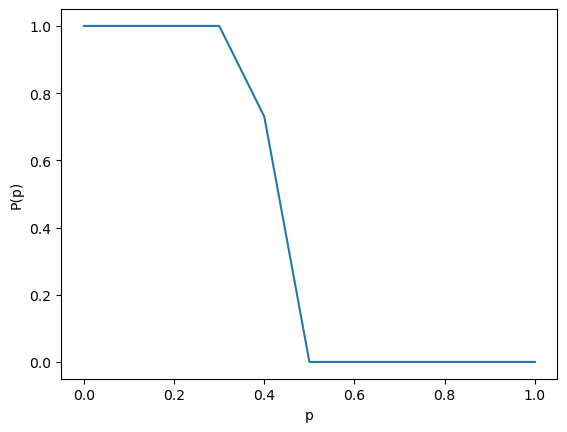

In [43]:
plot_graph(100, 50, bfs)

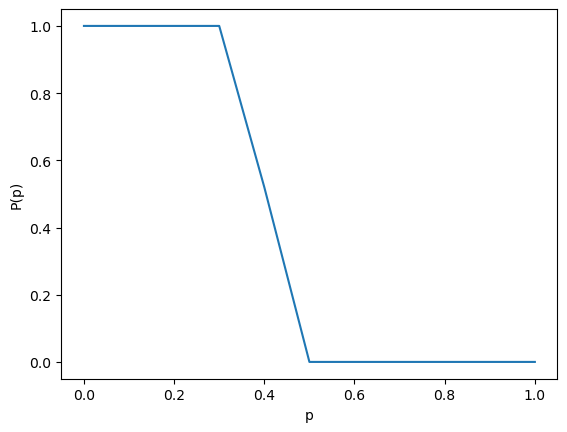

In [44]:
plot_graph(100, 50, dfs)